# Imports

In [1]:
import numpy as np

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

# DataFrame "le"

In [3]:
le = pd.read_csv('Life Expectancy Data.csv')

In [4]:
le.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
le.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# Heatmap showing NULL values

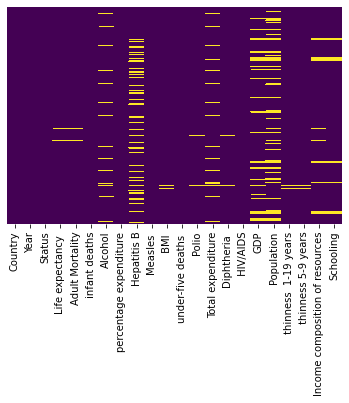

In [7]:
sns.heatmap(le.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Number of unique values for Country and Years

In [8]:
no_of_coun = le['Country'].nunique()
no_of_years = le['Year'].nunique()
print(no_of_coun)
print(no_of_years)

193
16


# Creating Dummy value for Status string value and Concatenating with "le"

In [9]:
status=pd.get_dummies(le['Status'],drop_first=True)
status.head()

,Developing
0,1
1,1
2,1
3,1
4,1


In [10]:
le=pd.concat([le,status],axis=1)
le.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developing
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1


# Imputation:
Replacing the null values with mean of the global data for the value.

In [11]:
column=['Year','Life expectancy ', 'Adult Mortality','infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
        'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
        'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
        ' thinness  1-19 years', ' thinness 5-9 years','Income composition of resources', 'Schooling',]

In [12]:
for col in column:
    le[col].fillna(value=le[col].mean(),inplace=True)

# Life Expectancy Distribution plot

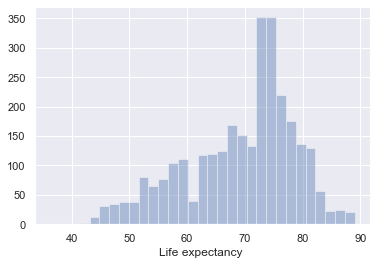

In [13]:
sns.set()
sns.distplot(le['Life expectancy '],kde=False)

# Verifying whether the number of null values is zero

In [14]:
le.drop(['Country','Status'],axis=1,inplace=True)
np.where(np.isnan(le))

(array([], dtype=int64), array([], dtype=int64))

Heatmap representing le after null values and unnecessary data removed

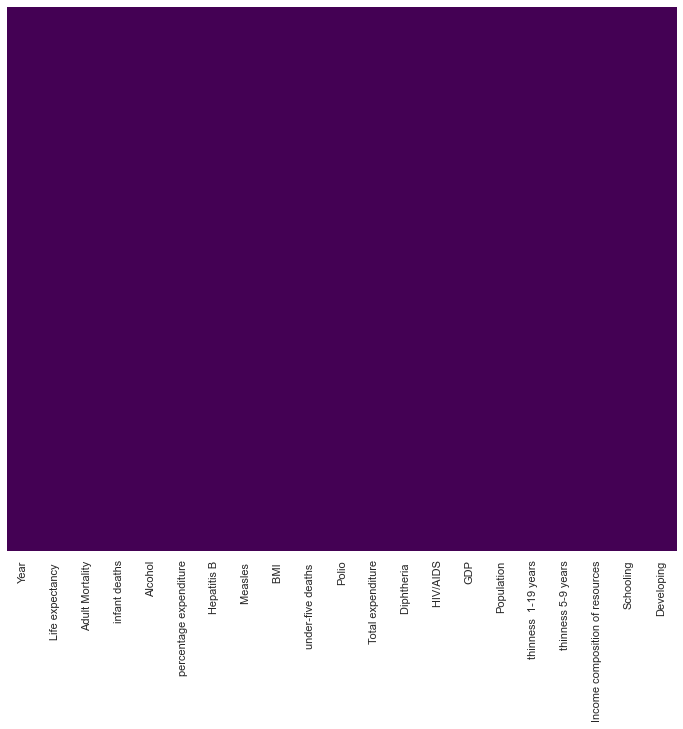

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(le.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Splitting Data and Training Model 

In [16]:
X=le[['Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Developing']]
y=le['Life expectancy ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [17]:
dm=LinearRegression()
dm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
pd.DataFrame(dm.coef_,X.columns,columns=['Coefficients'])

,Coefficients
Year,-3.841720e-03
Adult Mortality,-1.824086e-02
infant deaths,1.082177e-01
Alcohol,4.437281e-02
percentage expenditure,1.094802e-04
Hepatitis B,-1.166464e-02
Measles,-2.330445e-05
BMI,4.970298e-02
under-five deaths,-8.179791e-02
Polio,2.782258e-02


# Prediction and Error Calculation

In [19]:
predm=dm.predict(X_test)

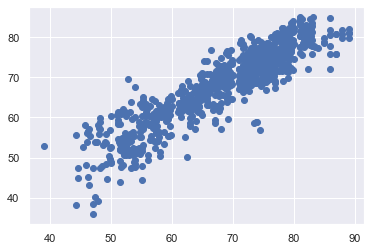

In [20]:
plt.scatter(y_test,predm)

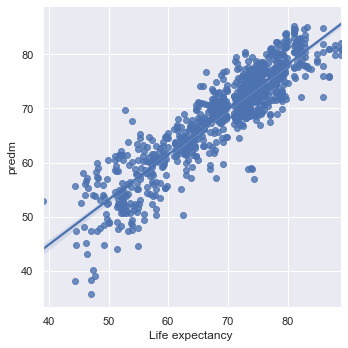

In [21]:
sns.lmplot('Life expectancy ','predm',data=pd.DataFrame(predm,y_test,columns=['predm']).reset_index())

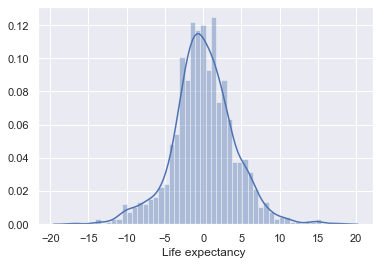

In [22]:
sns.distplot((y_test-predm),bins=50)

In [23]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,predm))
print('MSE:',metrics.mean_squared_error(y_test,predm))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predm)))

MAE: 3.043622698790817
MSE: 16.562173461900578
RMSE: 4.0696650306752
